## Conditional Graph
The objective of this graph is to:
1. implement conditional logic to route the flow of data to different nodes.
2. use `START` and `END` nodes to manage entry and exit points explicitly.
3. design multiple nodes to perform different operations (addition, subtraction)
4. create a router node to handle the decision making and control the flow of the graph

Graph output:
$$START -> router -> addition operation -> add_{node} -> END$$
or 
$$START -> router -> subtract operation -> subtract_{node} -> END$$

Based on the operation given the decision node (`router`) is going to termine what path to take.
The goal of this graph is to use `add_conditional_edges()`.

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
# define agent state
# GOAL: pass in two numbers and two operations
class AgentState(TypedDict):
    num1: int
    operation1: str
    num2: int
    result1: int
    num3: int
    operation2: str
    num4: int
    result2: int  # result of the operation

# define the node
def adder(state: AgentState) -> AgentState:
    """This node addes the two numbers"""

    state["result1"] = state["num1"] + state["num2"]
    return state

def subtracter(state: AgentState) -> AgentState:
    """This node subtracts the two numbers"""

    state["result1"] = state["num1"] - state["num2"]
    return state

# define the node
def adder_pt2(state: AgentState) -> AgentState:
    """This node addes the two numbers"""

    state["result2"] = state["num3"] + state["num4"]
    return state

def subtracter_pt2(state: AgentState) -> AgentState:
    """This node subtracts the two numbers"""

    state["result2"] = state["num3"] - state["num4"]
    return state

# this node is the decision maker based on the agent state schema (router)
def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    # define the condition to run either the add node or subtract node
    if state["operation1"] == "+":
        # if the operation is a +, we need to return the edge definition
        return "addition_operation"
    elif state["operation1"] == "-":
        return "subtraction_operation"
     # this does not return the state, only the graph's edge (so when adding the node we will need to define a passthrough function)


# this node is the decision maker based on the agent state schema (router)
def decide_next_node_pt2(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    # define the condition to run either the add node or subtract node
    if state["operation2"] == "+":
        # if the operation is a +, we need to return the edge definition
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"
    


In [3]:
# define the graph, nodes, and edges
workflow = StateGraph(AgentState)

# conditional loop 1
workflow.add_node("add", adder)
workflow.add_node("subtract", subtracter)
workflow.add_node("router", lambda state:state) # you are inputing and output the state

# conditional loop 2
workflow.add_node("add2", adder_pt2)
workflow.add_node('subtract2', subtracter_pt2)
workflow.add_node("router2", lambda state:state) # you are inputing and output the state

workflow.add_edge(START, "router")
workflow.add_conditional_edges(
    "router",  # source node
    decide_next_node,  # path (condition check)
    {  # path map 
        "addition_operation": "add",  # edge: node
        "subtraction_operation": "subtract"  # edge: node
    }
)

workflow.add_edge("add", "router2")
workflow.add_edge("subtract", "router2")

workflow.add_conditional_edges(
    "router2",  # source node
    decide_next_node_pt2, # path (condition check)
    {  # path map 
        "addition_operation2": "add2",  # edge: node
        "subtraction_operation2": "subtract2"  # edge: node
    }
)
workflow.add_edge("add2", END)
workflow.add_edge("subtract2", END)

application = workflow.compile()

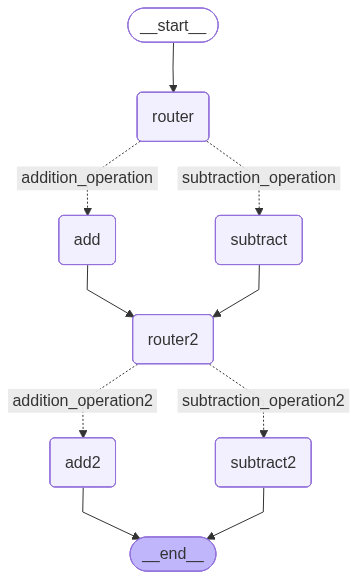

In [4]:
# extra step, but this visualizes the graph we created in LangGraph
from IPython.display import Image, display
display(Image(application.get_graph().draw_mermaid_png()))

In [5]:
input_val = {
    "num1": 5,
    "operation1": "+",
    "num2": 5,
    "num3": 3,
    "operation2": "-",
    "num4": 3
}
result = application.invoke(input_val)
result

{'num1': 5,
 'operation1': '+',
 'num2': 5,
 'result1': 10,
 'num3': 3,
 'operation2': '-',
 'num4': 3,
 'result2': 0}